In [95]:
# IMPORT LIBARIES AND DEPENDENCIES 
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from pathlib import Path
from dotenv import load_dotenv
import plotly.express as px
%matplotlib inline
import hvplot.pandas
import seaborn as sns

In [96]:
#PULL IN STOCK DATA FOR 2020
#IMPORT STOCK DATA FOR 3 HIGHEST CAP STOCKS IN THE 3 MOST RESILIENT AND 3 LEAST RESILIENT MSCI INDEXES
#Walmart, P&G, J&J. \\\
load_dotenv()

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [97]:
#VERIFY API KEYS ARE PULLING IN CORRECTLY
type(alpaca_api_key)

str

In [98]:
type(alpaca_secret_key)

str

In [99]:
len(alpaca_api_key)

20

In [100]:
len(alpaca_secret_key)

40

In [101]:
#SET API
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [102]:
#COMBINE DATA INTO ONE DF
list_of_tickers = ["WMT", "JNJ", "PG","JPM", "MCD","XOM"]

# YOUR CODE HERE
# Get all Asstes
assets = api.list_assets()

# Keep only tradeable assets
tradeable = [asset for asset in assets if asset.tradable ]

In [103]:
# Create a new empty DataFrame
asset_info_df = pd.DataFrame()
asset_info_df['symbol'] = pd.Series([asset.symbol for asset in assets])

# Display the first 10 asset tickers
asset_info_df.sample(5)

,symbol
1984,INT
9136,TCMD
2982,LAZY
318,DTY
7384,PPX


In [104]:
#DELINEATE RESILIENT TICKERS DATAFRAME FROM NON-RESILIENT TICKER DATAFRAME
#SETUP RESILIENT DF
resil_tickers = ["WMT", "JNJ", "PG"]

# Set timeframe to '1D'
timeframe = '1D'

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-252)

# Get 1 year's worth of historical data for WMT, JNJ and PG
dfr = api.get_barset(
    resil_tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df
dfr.head(10)

JNJ                                        \
                             open      high       low   close    volume   
2019-12-20 00:00:00-05:00  146.88  147.8400  144.8000  146.07  10594866   
2019-12-23 00:00:00-05:00  145.74  146.7600  145.3401  146.41   3575567   
2019-12-24 00:00:00-05:00  146.00  146.0100  145.2600  145.97   1729932   
2019-12-26 00:00:00-05:00  145.97  146.1827  145.1600  145.83   2233533   
2019-12-27 00:00:00-05:00  146.20  146.5500  145.5400  145.76   1939538   
2019-12-30 00:00:00-05:00  145.78  146.2000  145.0300  145.35   2089996   
2019-12-31 00:00:00-05:00  145.10  146.0100  144.7800  145.82   2541672   
2020-01-02 00:00:00-05:00  145.87  146.0200  145.0800  146.00   4380284   
2020-01-03 00:00:00-05:00  143.50  145.3730  143.0000  144.22   4547772   
2020-01-06 00:00:00-05:00  144.00  144.2000  142.8500  144.11   5168337   

                               PG                                        \
                             open      high       low   close    volume   
2019-12-20 00:00:00-05:00  126.15  126.6000  125.0300  125.37  10570598   
2019-12-23 00:00:00-05:00  125.52  125.8200  124.6850  124.91   4649046   
2019-12-24 00:00:00-05:00  124.79  125.3099  124.5800  125.18   1798951   
2019-12-26 00:00:00-05:00  125.10  125.7450  124.8700  125.23   3566876   
2019-12-27 00:00:00-05:00  125.56  126.2950  125.3900  126.07   2975061   
2019-12-30 00:00:00-05:00  125.76  125.9800  124.1400  124.51   2931062   
2019-12-31 00:00:00-05:00  124.43  124.9900  123.9500  124.87   2986857   
2020-01-02 00:00:00-05:00  124.50  124.7300  122.9400  123.41   5965498   
2020-01-03 00:00:00-05:00  122.16  123.5300  121.8600  122.53   5620548   
2020-01-06 00:00:00-05:00  122.57  123.1900  122.3787  122.75   4535596   

                              WMT                                       
                             open      high       low   close   volume  
2019-12-20 00:00:00-05:00  121.48  122.1200  120.0200  120.29  6628305  
2019-12-23 00:00:00-05:00  120.20  120.6900  119.0100  119.03  3504298  
2019-12-24 00:00:00-05:00  119.13  119.6000  119.0100  119.52  1991969  
2019-12-26 00:00:00-05:00  119.61  119.8500  118.9500  119.55  3062390  
2019-12-27 00:00:00-05:00  119.94  119.9400  119.2450  119.57  2557506  
2019-12-30 00:00:00-05:00  119.80  119.8100  119.1300  119.42  2373893  
2019-12-31 00:00:00-05:00  119.50  119.8000  118.1900  118.79  3439010  
2020-01-02 00:00:00-05:00  118.86  119.8900  118.7016  118.94  5449703  
2020-01-03 00:00:00-05:00  118.27  118.7886  117.5900  117.86  3749591  
2020-01-06 00:00:00-05:00  117.40  118.0900  116.7700  117.65  3943106

In [105]:
#CLEAN UP THE COLUMNS TO ONLY SHOW CLOSE & DATE
dfr.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
dfr.head(10)

,JNJ,PG,WMT
,close,close,close
2019-12-20 00:00:00-05:00,146.07,125.37,120.29
2019-12-23 00:00:00-05:00,146.41,124.91,119.03
2019-12-24 00:00:00-05:00,145.97,125.18,119.52
2019-12-26 00:00:00-05:00,145.83,125.23,119.55
2019-12-27 00:00:00-05:00,145.76,126.07,119.57
2019-12-30 00:00:00-05:00,145.35,124.51,119.42
2019-12-31 00:00:00-05:00,145.82,124.87,118.79
2020-01-02 00:00:00-05:00,146.00,123.41,118.94
2020-01-03 00:00:00-05:00,144.22,122.53,117.86


In [106]:
#DEFINE DAILY RETURNS FOR RESILIENT DF
resil_daily_returns = dfr.pct_change()
resil_daily_returns.head(10)

,JNJ,PG,WMT
,close,close,close
2019-12-20 00:00:00-05:00,NaN,NaN,NaN
2019-12-23 00:00:00-05:00,0.002328,-0.003669,-0.010475
2019-12-24 00:00:00-05:00,-0.003005,0.002162,0.004117
2019-12-26 00:00:00-05:00,-0.000959,0.000399,0.000251
2019-12-27 00:00:00-05:00,-0.000480,0.006708,0.000167
2019-12-30 00:00:00-05:00,-0.002813,-0.012374,-0.001254
2019-12-31 00:00:00-05:00,0.003234,0.002891,-0.005275
2020-01-02 00:00:00-05:00,0.001234,-0.011692,0.001263
2020-01-03 00:00:00-05:00,-0.012192,-0.007131,-0.009080


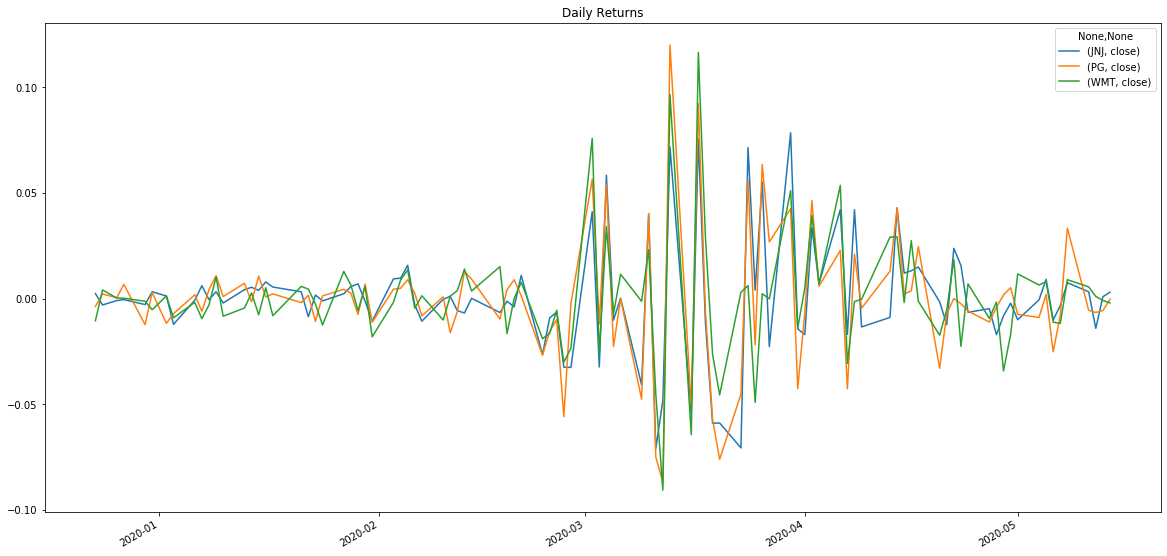

In [127]:
#PLOT DAILY RETURNS FOR RESILIENT DF
resil_daily_returns.plot(figsize=(20, 10), title="Daily Returns")

In [108]:
#CALCULATE AVERAGE DAILY RETURNS OF RESILIENT STOCKS
avg_daily_return_wmt = resil_daily_returns.mean()['WMT']['close']
avg_daily_return_jnj = resil_daily_returns.mean()['JNJ']['close']
avg_daily_return_pg = resil_daily_returns.mean()['PG']['close']
print(f"The Mean of Daily Returns are: Walmart: {avg_daily_return_wmt}, Johnson & Johnson: {avg_daily_return_jnj}, Proctor & Gamble: {avg_daily_return_pg}")

The Mean of Daily Returns are: Walmart: 0.0006119710751574359, Johnson & Johnson: 0.00047075443668848587, Proctor & Gamble: -0.0005231579146117491


In [109]:
#CALCULATE STD OF RETURNS OF RESILIENT STOCKS
std_daily_return_wmt = resil_daily_returns.std()['WMT']['close']
std_daily_return_jnj = resil_daily_returns.std()['JNJ']['close']
std_daily_return_pg = resil_daily_returns.std()['PG']['close']
print(f"The Standard Deviation of Returns: Walmart: {std_daily_return_wmt}, Johnson & Johnson: {std_daily_return_jnj}, Proctor & Gamble: {std_daily_return_pg}")

The Standard Deviation of Returns: Walmart: 0.026822291593630334, Johnson & Johnson: 0.027122166683214453, Proctor & Gamble: 0.03025908409870834


In [111]:
#DELINEATE RESILIENT TICKERS DATAFRAME FROM NON-RESILIENT TICKER DATAFRAME
#SETUP NON-RESILIENT DF
nonresil_tickers = ["JPM", "MCD", "XOM"]

# Set timeframe to '1D'
timeframe = '1D'

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-252)

# Get 1 year's worth of historical data for JPM, MCD and XOM
dfnr = api.get_barset(
    nonresil_tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df
dfnr.head(10)

JPM                                         MCD  \
                             open    high       low   close    volume    open   
2019-12-20 00:00:00-05:00  138.02  138.88  136.9000  137.24  16546366  198.55   
2019-12-23 00:00:00-05:00  137.60  137.91  136.8800  137.22   6193775  197.54   
2019-12-24 00:00:00-05:00  137.33  137.63  137.0641  137.58   2824296  195.93   
2019-12-26 00:00:00-05:00  137.89  139.10  137.7800  139.09   4753888  196.61   
2019-12-27 00:00:00-05:00  139.30  139.77  138.6697  139.14   4864945  197.33   
2019-12-30 00:00:00-05:00  139.90  140.08  138.4700  138.68   5571805  197.58   
2019-12-31 00:00:00-05:00  138.51  139.48  138.2950  139.40   4896689  196.80   
2020-01-02 00:00:00-05:00  139.79  141.10  139.2650  141.09   8484783  198.00   
2020-01-03 00:00:00-05:00  137.50  139.23  137.0800  138.28   8191470  199.39   
2020-01-06 00:00:00-05:00  136.56  138.27  136.5000  138.21   6884814  199.60   

                                                                  XOM  \
                               high       low   close   volume   open   
2019-12-20 00:00:00-05:00  199.0000  196.6500  197.16  3874156  69.86   
2019-12-23 00:00:00-05:00  197.5400  196.0300  196.23  1675904  69.86   
2019-12-24 00:00:00-05:00  197.1400  195.6700  196.68   712857  70.35   
2019-12-26 00:00:00-05:00  197.1600  196.1627  197.16  1212708  70.19   
2019-12-27 00:00:00-05:00  198.4700  197.1750  198.16  1504372  70.20   
2019-12-30 00:00:00-05:00  197.8000  195.9400  196.99  1780512  70.09   
2019-12-31 00:00:00-05:00  197.9500  196.5579  197.55  1694891  69.02   
2020-01-02 00:00:00-05:00  200.8000  197.8100  200.80  2886391  70.24   
2020-01-03 00:00:00-05:00  200.5500  198.8500  200.02  2031901  71.34   
2020-01-06 00:00:00-05:00  202.7673  199.3500  202.33  3558314  70.32   

                                                              
                              high      low  close    volume  
2019-12-20 00:00:00-05:00  70.2267  69.3900  69.94  22033157  
2019-12-23 00:00:00-05:00  70.3000  69.5300  70.29   9451860  
2019-12-24 00:00:00-05:00  70.5000  69.9101  70.02   3650368  
2019-12-26 00:00:00-05:00  70.5000  70.0100  70.13   6831328  
2019-12-27 00:00:00-05:00  70.3123  69.8800  69.89   7459006  
2019-12-30 00:00:00-05:00  70.4350  69.4000  69.48  10463554  
2019-12-31 00:00:00-05:00  69.8000  69.0100  69.76   9526602  
2020-01-02 00:00:00-05:00  71.0200  70.2368  70.90  10586614  
2020-01-03 00:00:00-05:00  71.3700  70.1600  70.32  14148606  
2020-01-06 00:00:00-05:00  71.3550  70.2300  70.87  16859539

In [112]:
#CLEAN UP THE COLUMNS TO ONLY SHOW CLOSE & DATE
dfnr.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
dfnr.head(10)

,JPM,MCD,XOM
,close,close,close
2019-12-20 00:00:00-05:00,137.24,197.16,69.94
2019-12-23 00:00:00-05:00,137.22,196.23,70.29
2019-12-24 00:00:00-05:00,137.58,196.68,70.02
2019-12-26 00:00:00-05:00,139.09,197.16,70.13
2019-12-27 00:00:00-05:00,139.14,198.16,69.89
2019-12-30 00:00:00-05:00,138.68,196.99,69.48
2019-12-31 00:00:00-05:00,139.40,197.55,69.76
2020-01-02 00:00:00-05:00,141.09,200.80,70.90
2020-01-03 00:00:00-05:00,138.28,200.02,70.32


In [113]:
#DEFINE DAILY RETURNS FOR NON-RESILIENT DF
nonresil_daily_returns = dfnr.pct_change()
nonresil_daily_returns.head(10)

,JPM,MCD,XOM
,close,close,close
2019-12-20 00:00:00-05:00,NaN,NaN,NaN
2019-12-23 00:00:00-05:00,-0.000146,-0.004717,0.005004
2019-12-24 00:00:00-05:00,0.002624,0.002293,-0.003841
2019-12-26 00:00:00-05:00,0.010975,0.002441,0.001571
2019-12-27 00:00:00-05:00,0.000359,0.005072,-0.003422
2019-12-30 00:00:00-05:00,-0.003306,-0.005904,-0.005866
2019-12-31 00:00:00-05:00,0.005192,0.002843,0.004030
2020-01-02 00:00:00-05:00,0.012123,0.016452,0.016342
2020-01-03 00:00:00-05:00,-0.019916,-0.003884,-0.008181


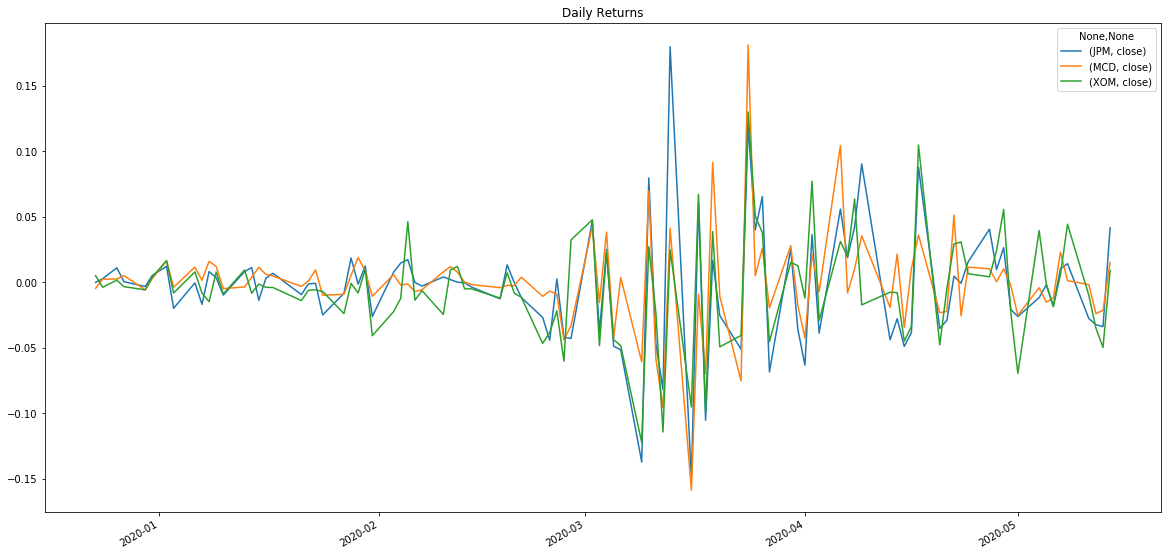

In [114]:
#PLOT DAILY RETURNS FOR NON-RESILIENT DF
nonresil_daily_returns.plot(figsize=(20, 10), title="Daily Returns")

In [115]:
#CALCULATE AVERAGE DAILY RETURNS OF NON-RESILIENT STOCKS
avg_daily_return_JPM = nonresil_daily_returns.mean()['JPM']['close']
avg_daily_return_MCD = nonresil_daily_returns.mean()['MCD']['close']
avg_daily_return_XOM = nonresil_daily_returns.mean()['XOM']['close']
print(f"The Mean of Daily Returns are: JP Morgan: {avg_daily_return_wmt}, McDonald's Corp: {avg_daily_return_jnj}, Exxon Mobile Corporation: {avg_daily_return_pg}")

The Mean of Daily Returns are: JP Morgan: 0.0006119710751574359, McDonald's Corp: 0.00047075443668848587, Exxon Mobile Corporation: -0.0005231579146117491


In [116]:
#CALCULATE STD OF RETURNS OF NON-RESILIENT STOCKS
std_daily_return_JPM = nonresil_daily_returns.std()['JPM']['close']
std_daily_return_MCD = nonresil_daily_returns.std()['MCD']['close']
std_daily_return_XOM = nonresil_daily_returns.std()['XOM']['close']
print(f"The Standard Deviation of Returns: JP Morgan: {std_daily_return_wmt}, McDonald's Corp: {std_daily_return_jnj}, Exxon Mobile Corporation: {std_daily_return_pg}")

The Standard Deviation of Returns: JP Morgan: 0.026822291593630334, McDonald's Corp: 0.027122166683214453, Exxon Mobile Corporation: 0.03025908409870834


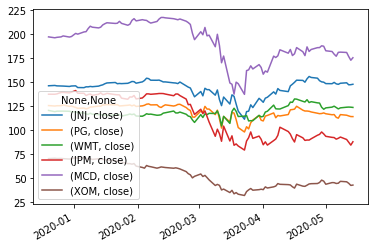

In [117]:
#CREATE AGGREGATE PLOT BY COMBINING NON-RESILIENT DF w/ RESILIENT DF FOR COMPARISON
#all_tickers = (dfnr + dfr)
ax = dfr.plot()
dfnr.plot(ax=ax)

## CALCULATE ROLLING

### PLOT DAILY CLOSING PRICES FOR BOTH RESILIENT & NON-RESILIENT STOCKS

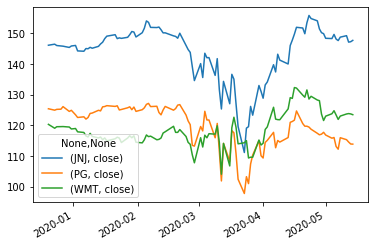

In [133]:
# RESILIENT
dfr.plot()

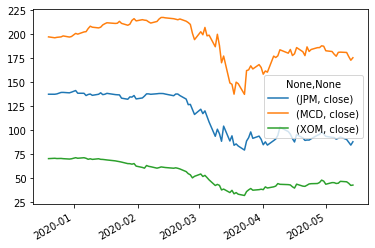

In [121]:
#NON-RESILIENT
dfnr.plot()

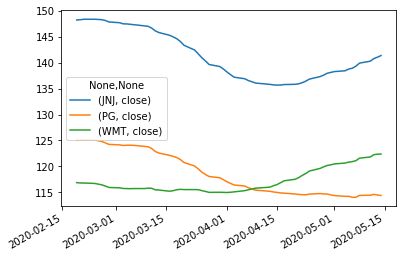

In [122]:
#ROLLING 40-DAY MEAN OF CLOSING PRICES FOR RESILIENT STOCKS
dfr.rolling(window=40).mean().plot()

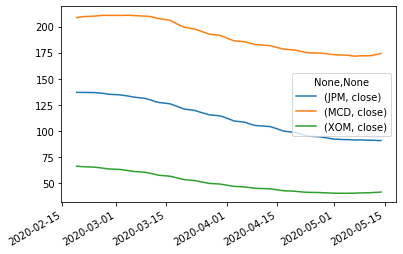

In [123]:
#ROLLING 40-DAY MEAN OF CLOSING PRICES FOR NON-RESILIENT STOCKS
dfnr.rolling(window=40).mean().plot()